# Inference of SRGAN & SRResnet trained with Cars Dataset

In [1]:
import torch

import torchvision

from IPython.display import display
from PIL import Image

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from src.models.model import Generator, Discriminator
from src.data.dataset import get_dataloader

In [2]:
SEED = 0
BATCH_SIZE = 2

In [3]:
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device being used: {}".format(DEVICE))

Device being used: cuda


# Load Trained Model

In [4]:
srresnet = Generator()
srgan_g = Generator()

srresnet.load_state_dict(torch.load("../models/sr_resnet-g_cars-dataset.pt"), strict=False)
srgan_g.load_state_dict(torch.load("../models/sr-g_cars-dataset.pt"), strict=False)

<All keys matched successfully>

In [5]:
srresnet.to(DEVICE).eval()
srgan_g.to(DEVICE).eval()

Generator(
  (initial): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (residual_blocks): Sequential(
    (0): Residual_Block(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Residual_Block(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=

In [6]:
toPIL = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
])

In [7]:
train_folder = "../data/raw/cars_test/cars_test/"
test_folder = "../data/raw/cars_train/cars_train/"

train_loader, test_loader = get_dataloader(train_folder, test_folder, batch_size=BATCH_SIZE)

print("Train Dataset Length: {}".format(len(train_loader)))
print("Test Dataset Length: {}".format(len(test_loader)))

Train Dataset Length: 4021
Test Dataset Length: 4072


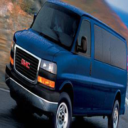

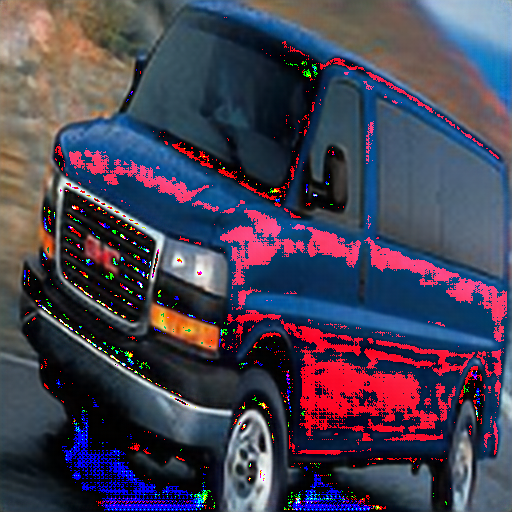

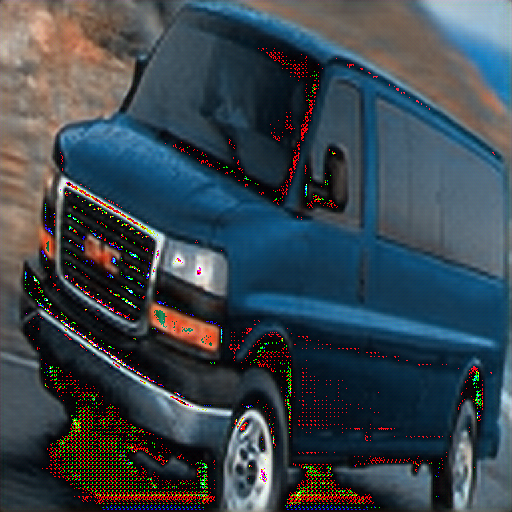

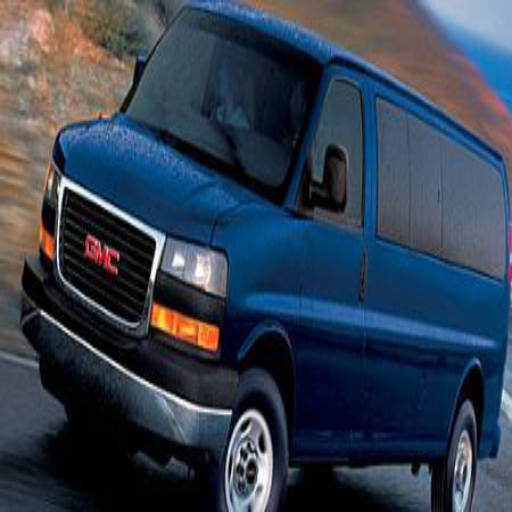

In [8]:
for batch_idx, (original_img, train_img) in enumerate(train_loader):
    original_img = original_img.to(DEVICE)
    train_img = train_img.to(DEVICE)
    
    srresnet_fake_img = srresnet(train_img)
    srgan_fake_img = srgan_g(train_img)
    
    display(toPIL(train_img[0].squeeze(0)))
    display(toPIL(srresnet_fake_img[0].squeeze(0)))
    display(toPIL(srgan_fake_img[0].squeeze(0)))
    display(toPIL(original_img[0].squeeze(0)))
    
    break